In [7]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [8]:
car_dataset = pd.read_csv('/content/Car dataset.csv')

In [9]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [10]:
car_dataset.shape

(4340, 8)

In [11]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [12]:
car_dataset.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0


In [13]:
car_dataset['fuel'].value_counts()

,count
fuel,
Diesel,2153
Petrol,2123
CNG,40
LPG,23
Electric,1


In [14]:
car_dataset['seller_type'].value_counts()

,count
seller_type,
Individual,3244
Dealer,994
Trustmark Dealer,102


In [15]:
car_dataset['transmission'].value_counts()

,count
transmission,
Manual,3892
Automatic,448


In [16]:
car_dataset['owner'].value_counts()

,count
owner,
First Owner,2832
Second Owner,1106
Third Owner,304
Fourth & Above Owner,81
Test Drive Car,17


In [17]:
car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
car_dataset.replace({'transmission':{'Manual':0,'Automatic':1}},inplace=True)
car_dataset.replace({'owner':{'First Owner':0,'Second Owner':1,'Third Owner':2,'Fourth & Above Owner':3,'Test Drive Car':4}},inplace=True)

<ipython-input-17-1af1ccedda4c>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'fuel':{'Diesel':0,'Petrol':1,'CNG':2,'LPG':3,'Electric':4}},inplace=True)
<ipython-input-17-1af1ccedda4c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'seller_type':{'Individual':0,'Dealer':1,'Trustmark Dealer':2}},inplace=True)
<ipython-input-17-1af1ccedda4c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly c

In [24]:
car_dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,1,0,0,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,1,0,0,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0,0,0,0
3,Datsun RediGO T Option,2017,250000,46000,1,0,0,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0,0,0,1


In [75]:
X = car_dataset.drop(['name','selling_price'],axis=1)
Y = car_dataset['selling_price']

In [76]:
print(X)

      year  km_driven  fuel  seller_type  transmission  owner
0     2007      70000     1            0             0      0
1     2007      50000     1            0             0      0
2     2012     100000     0            0             0      0
3     2017      46000     1            0             0      0
4     2014     141000     0            0             0      1
...    ...        ...   ...          ...           ...    ...
4335  2014      80000     0            0             0      1
4336  2014      80000     0            0             0      1
4337  2009      83000     1            0             0      1
4338  2016      90000     0            0             0      0
4339  2016      40000     1            0             0      0

[4340 rows x 6 columns]


In [77]:
print(Y)

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64


In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.1, random_state=1)

In [130]:
print(X.shape, X_train.shape, X_test.shape)

(4340, 6) (3906, 6) (434, 6)


In [131]:
processor = ColumnTransformer(
    transformers=[
        ("ohe", OneHotEncoder(drop="first"),["fuel", "seller_type", "transmission", "owner"]),
        ("stdscl", StandardScaler(),["km_driven", "year"])
    ])

In [132]:
model = RandomForestRegressor(n_estimators=100)

In [133]:
pipeline = Pipeline(steps=[
    ("processor", processor),
    ("model", model)
])

In [134]:
pipeline.fit(X_train, Y_train)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('ohe',
                                                  OneHotEncoder(drop='first'),
                                                  ['fuel', 'seller_type',
                                                   'transmission', 'owner']),
                                                 ('stdscl', StandardScaler(),
                                                  ['km_driven', 'year'])])),
                ('model', RandomForestRegressor())])

In [135]:
X_train_prediction = pipeline.predict(X_train)

In [136]:
score_1 = metrics.r2_score(Y_train, X_train_prediction)
print(score_1)

0.9180520673441936


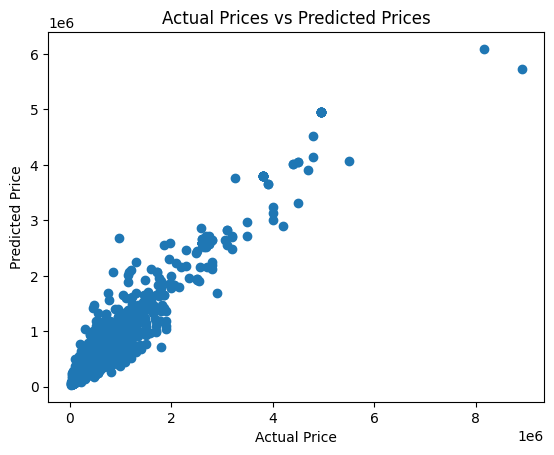

In [137]:
plt.scatter(Y_train, X_train_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [138]:
X_test_prediction = pipeline.predict(X_test)

In [139]:
score_2 = metrics.r2_score(Y_test, X_test_prediction)
print(score_2)

0.8323985488948497


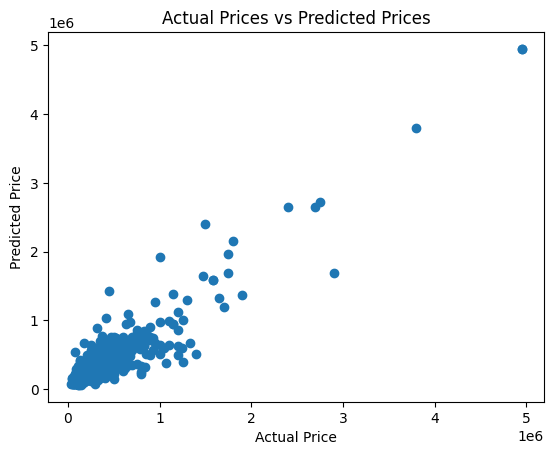

In [140]:
plt.scatter(Y_test, X_test_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

In [141]:
# Save the pipeline model using pickle
with open('predict_car_price.pkl', 'wb') as file:
    pickle.dump(pipeline, file)